Выполнить дискретное вейвлет- преобразование (ДВП) своих ВР.
•	Выбрать уровень разложения. Получить дерево. Объяснить.
•	Выполнить декомпозицию ВР. Выделить уровни разложения, где видна периодичность. 
    Найти длину периодов. Объяснить. ?
•	Провести удаление шума. Объяснить, что и почему выбрано шумом.
    Показать восстановленный ВР без шумовых компонент. ?

In [1]:
import numpy as np
import pandas as pd
import pywt


from scipy import fftpack
from scipy import signal

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [3]:
data = pd.read_table('data/asteroid_data.dat',sep=" ", header=None).drop(2,axis=1)
data.columns = ['time','value']
print(data.shape)

(20182, 2)


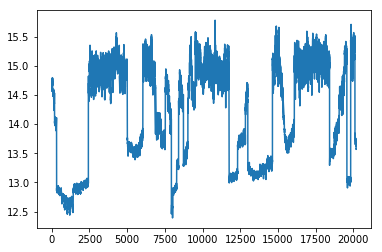

In [4]:
x = data.value.values
n = len(x)
fig, ax = plt.subplots()
ax.plot(x[:n])

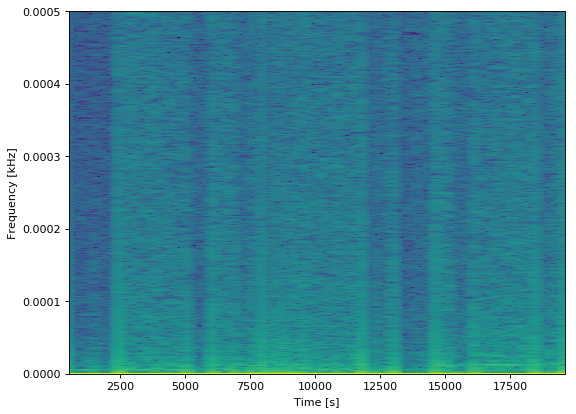

In [5]:
freqs, times, Sx = signal.spectrogram(x, fs=1, window='hanning',
                                      nperseg=1024, noverlap=1024 - 100,
                                      detrend=False, scaling='spectrum')

f, ax = plt.subplots(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

In [6]:
for family in pywt.families():
    print("%s family: " % family + ', '.join(pywt.wavelist(family)))

haar family: haar
db family: db1, db2, db3, db4, db5, db6, db7, db8, db9, db10, db11, db12, db13, db14, db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25, db26, db27, db28, db29, db30, db31, db32, db33, db34, db35, db36, db37, db38
sym family: sym2, sym3, sym4, sym5, sym6, sym7, sym8, sym9, sym10, sym11, sym12, sym13, sym14, sym15, sym16, sym17, sym18, sym19, sym20
coif family: coif1, coif2, coif3, coif4, coif5, coif6, coif7, coif8, coif9, coif10, coif11, coif12, coif13, coif14, coif15, coif16, coif17
bior family: bior1.1, bior1.3, bior1.5, bior2.2, bior2.4, bior2.6, bior2.8, bior3.1, bior3.3, bior3.5, bior3.7, bior3.9, bior4.4, bior5.5, bior6.8
rbio family: rbio1.1, rbio1.3, rbio1.5, rbio2.2, rbio2.4, rbio2.6, rbio2.8, rbio3.1, rbio3.3, rbio3.5, rbio3.7, rbio3.9, rbio4.4, rbio5.5, rbio6.8
dmey family: dmey
gaus family: gaus1, gaus2, gaus3, gaus4, gaus5, gaus6, gaus7, gaus8
mexh family: mexh
morl family: morl
cgau family: cgau1, cgau2, cgau3, cgau4, cgau5, cgau6, cgau7, 

In [7]:
w = pywt.Wavelet('db8')
print(w)

Wavelet db8
  Family name:    Daubechies
  Short name:     db
  Filters length: 16
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [8]:
def plot(cA, cD,itr=None):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(cA)
    if itr:
        axarr[0].set_title('Iteration ' + str(itr))
    axarr[1].plot(cD, c="red")

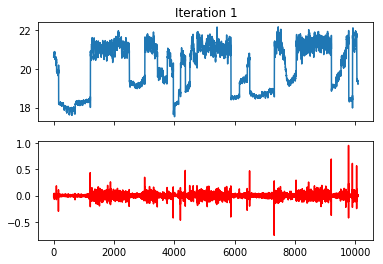

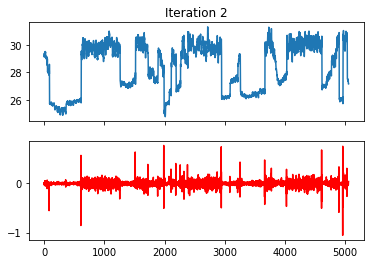

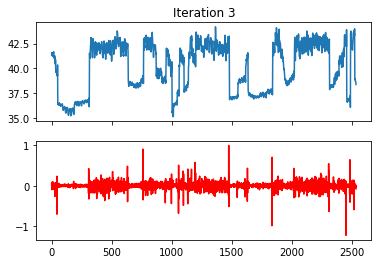

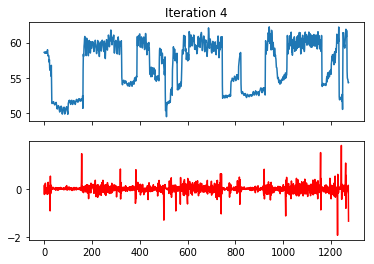

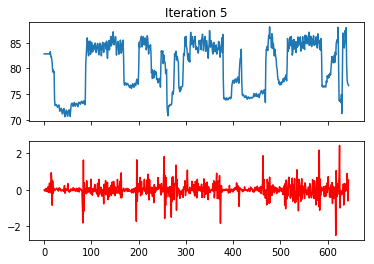

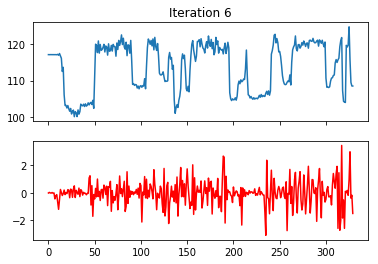

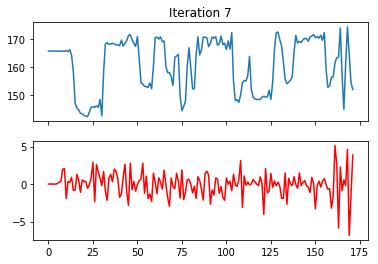

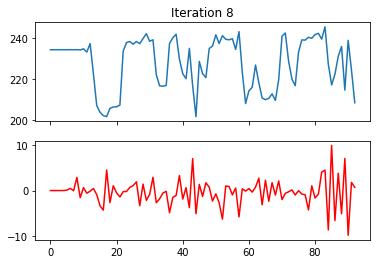

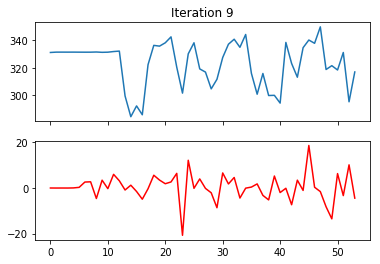

In [9]:
curr = x
coef_mas = []
for index in range(1,10):
    cA, cD = pywt.dwt(curr, w) # Approximation and detail coefficients.
    coef_mas.append([cA,cD])
    plot(cA,cD, itr=str(index))
    curr = cA
coef_mas = np.array(coef_mas)

In [ ]:
# Восстановленный временной ряд без шумовых компонент

In [10]:
cA_last, cD_last = coef_mas[-1] # аппроксимирующие и детализирующие коэффициенты с последней итерации,
# где видна периодичность

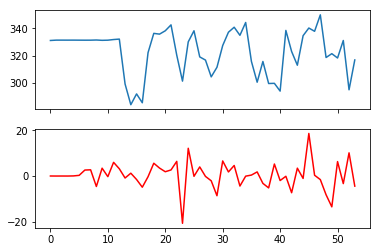

In [11]:
plot(cA_last, cD_last)

In [12]:
reconstruct = pywt.idwt(cA_last, cD_last, w)

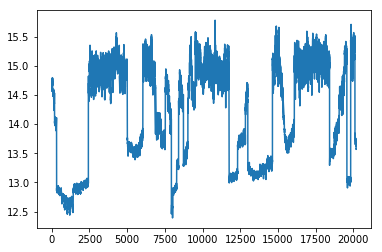

In [13]:
fig, ax = plt.subplots()
ax.plot(x[:n])

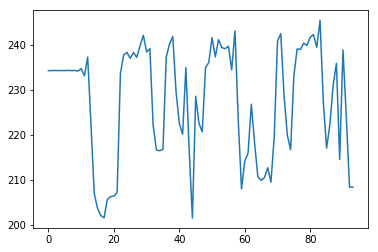

In [14]:
fig, ax = plt.subplots()
ax.plot(reconstruct)